In [6]:
#Credit Card Fraud Detection
#data set from kaggle creditcard.csv
#open jupyter notebook
#install numpy, panda etc..........
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print ('Python: {}'.format(sys.version))
print ('Numpy: {}'.format(numpy.__version__))
print ('Pandas: {}'.format(pandas.__version__))
print ('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('sklearn: {}'.format(sklearn.__version__))



Python: 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:09) [MSC v.1500 64 bit (AMD64)]
Numpy: 1.15.1
Pandas: 0.23.4
Matplotlib: 2.2.3
Seaborn: 0.9.0
Scipy: 1.1.0
sklearn: 0.19.2


In [13]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#load the dataset from the csv file using pandas
data = pd.read_csv('C:\Users\GUNISH\Desktop\dataset_ML\creditcard.csv')


In [31]:
print(data.columns)


Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount', u'Class'],
      dtype='object')


In [43]:
print(data.shape)

(2848, 31)


In [36]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [45]:
#fraction of data 
data = data.sample(frac = 0.1,random_state = 1)
print(data.shape)

(28481, 31)


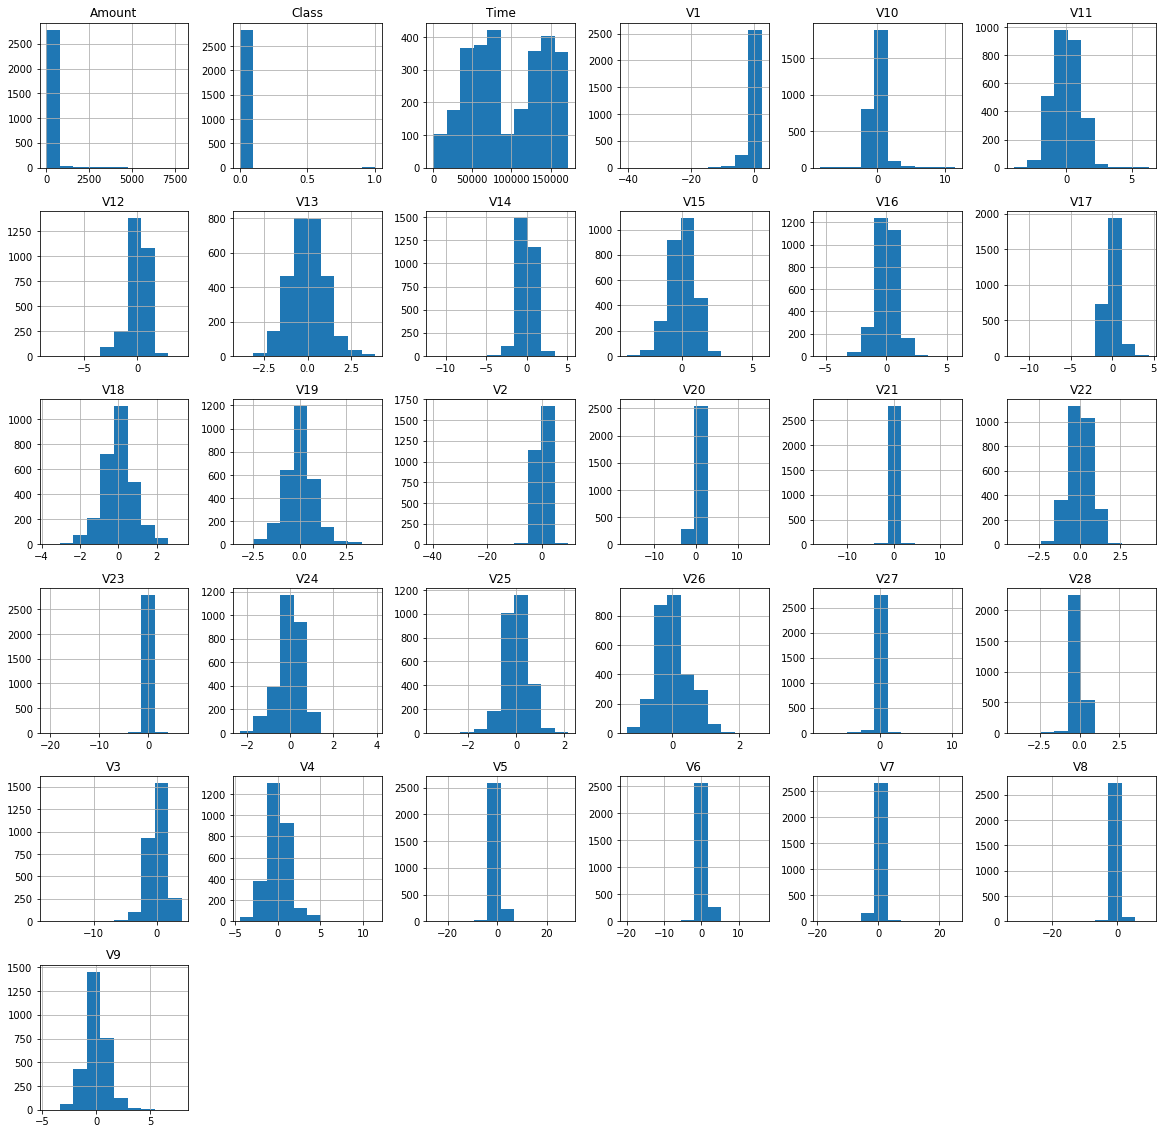

In [40]:
data.hist(figsize = (20,20))
plt.show()

In [47]:
#getting outlier fraction
#determine number of fraud cases in dataset

fraud = data[data['Class']==1]
valid = data[data['Class']==0]
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)
print('fraud Cases : {}'.format(len(fraud)))
print('valid cases: {}'.format(len(valid)))


0.00172341024198
fraud Cases : 49
valid cases: 28432


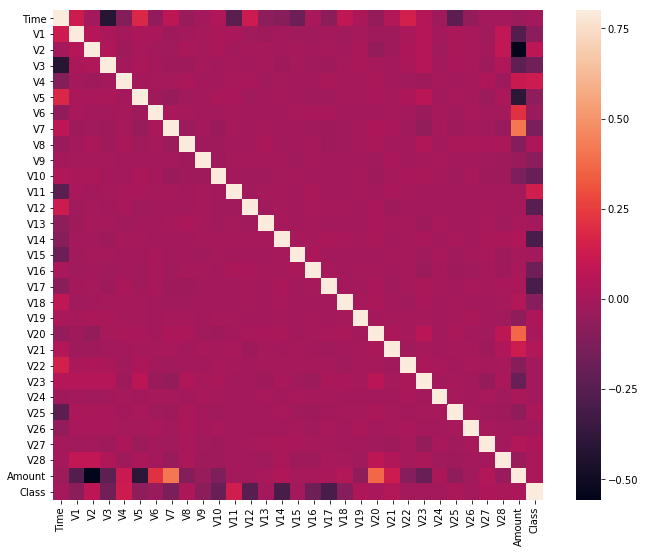

In [50]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat,vmax = .8,square = True)
plt.show()

In [53]:
#get all the columns from the dataframe
columns = data.columns.tolist()

#filter the columns to remove data we do want
columns = [c for c in columns if c not in ["Class"]]

#store the variable we will be predicting on
target = "Class"

X = data[columns]
Y = data[target]

#print the shapes of X and Y

print(X.shape)
print(Y.shape)

(28481, 30)
(28481L,)


In [58]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [60]:
#define a random state
state = 1

#define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state= state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                              contamination= outlier_fraction)
}

In [67]:
#fit the model

n_outliers = len(fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))



        

Local Outlier Factor: 97
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481

Isolation Forest: 71
0.99750711000316
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

